  import required modules

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics
from PIL import Image
from sklearn.neural_network import MLPClassifier
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

%matplotlib inline

unzipping the faces zip file

In [5]:

with zipfile.ZipFile('/faces.zip', 'r') as zip_ref:
    zip_ref.extractall('/')

utility functions to draw the pictuers,draw the confusion matrix and do the ann

In [16]:
#draw pictures
def draw(img,label,ppf): 
    n=len(img)
    m=n//ppf
    for j in range(m):
      plt.figure(figsize=(ppf*25,25))
      for index,(i,l) in enumerate(zip(img[j*ppf:(j+1)*ppf],label[j*ppf:(j+1)*ppf])):
        plt.subplot(1,ppf*25,index+1)
        plt.imshow(np.reshape(i,(30,32)),cmap='gray')
        plt.title(str(l))
    if n%ppf!=0:
      ppf=n%ppf
      plt.figure(figsize=(ppf*30,30))
      for index,(i,l) in enumerate(zip(img[m*ppf:(m+1)*ppf],label[m*ppf:(m+1)*ppf])):
        plt.subplot(1,ppf*30,index+1)
        plt.imshow(np.reshape(i,(30,32)),cmap='gray')
        plt.title(str(l))

# draw the confusion matrix
def confusion_matrix(cm):
    plt.figure(figsize=(2,2))
    plt.imshow(cm,cmap='coolwarm_r')
    plt.title('Confusion matrix')
    plt.xticks(np.arange(2))
    plt.yticks(np.arange(2))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    w,h=cm.shape
    for x in range(w):
      for y in range(h):
        plt.annotate(str(cm[x][y]),xy=(x,y),horizontalalignment='center',
                     verticalalignment='center')

# do ann
def do_ann(number_of_layers,x_train,x_test,y_train,y_test):
    print('doing ann with {n} layers'.format(n=number_of_layers))
    clf=MLPClassifier(hidden_layer_sizes=(number_of_layers,),solver='lbfgs',
                      alpha=1e-5,random_state=1)
    clf.fit(x_train,y_train)
    prediction=clf.predict(x_test)
    cm=metrics.confusion_matrix(y_test,prediction)
    confusion_matrix(cm)
    print('accuracy is : ',clf.score(x_test,y_test)) 
    wrong_pic=[]
    wrong_label=[]
    for i in range(len(x_test)):
      if prediction[i]!=y_test[i]:
            wrong_pic.append(x_test[i])
            wrong_label.append(prediction[i])
    print('printing the wrong guesses')
    draw(wrong_pic,wrong_label,20)

fetching and processing the data
0 represents no sunglasses and 1 represents sunglasses

In [10]:
path='/faces/'
on='sunglasses'
images=os.listdir(path)
data=[]
target=[]
for i in images:
  image=asarray(Image.open(path+i),dtype=float)
  data.append(image)
  if on in i:
    target.append(1)
  else:
    target.append(0)
data=np.array(data)
target=np.array(target)
nsamples, nx, ny = data.shape
data=np.reshape(data,(nsamples,nx*ny))

draw all the data and split it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


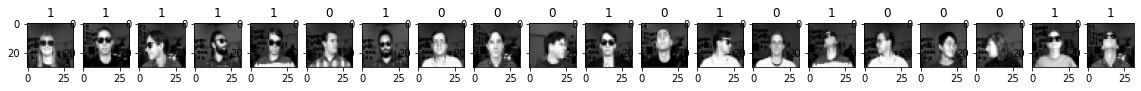

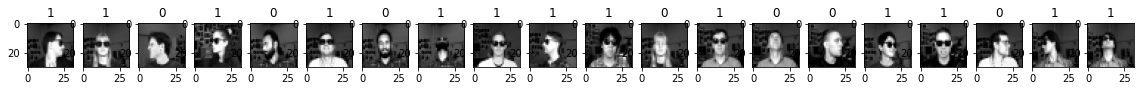

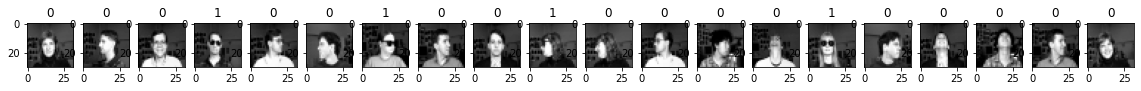

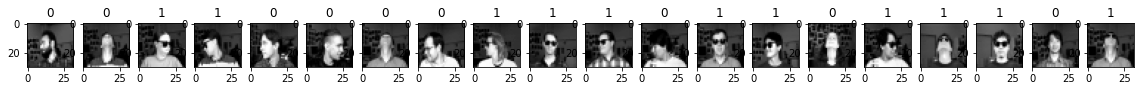

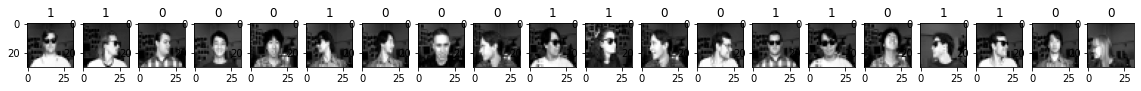

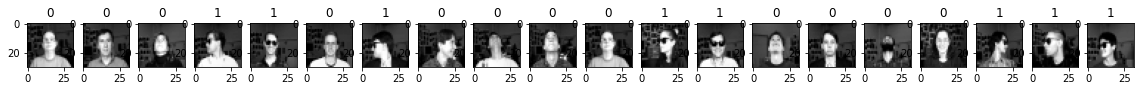

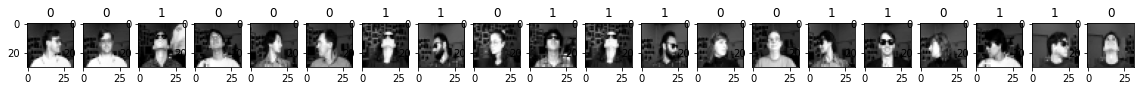

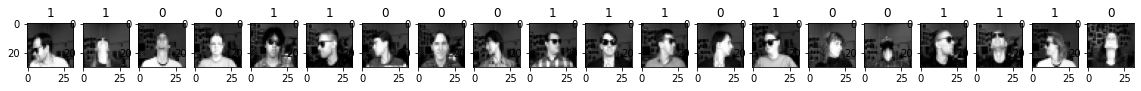

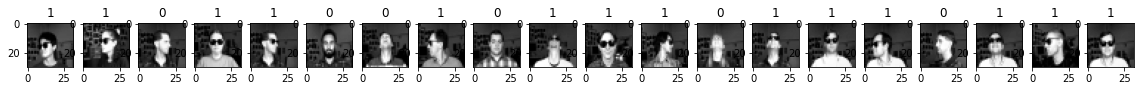

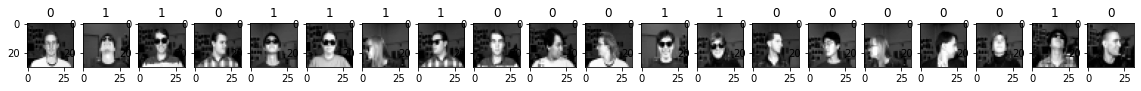

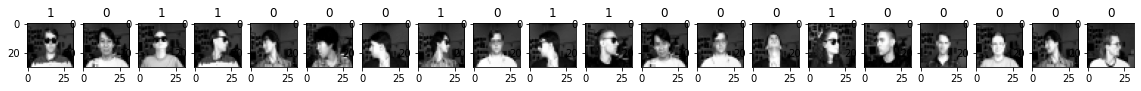

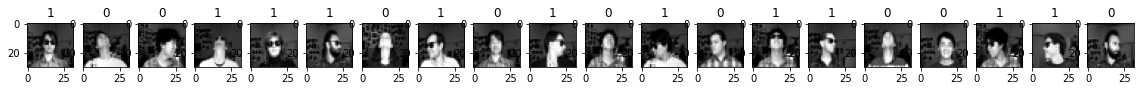

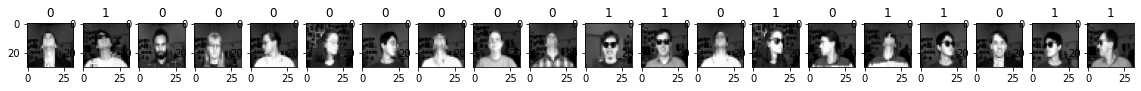

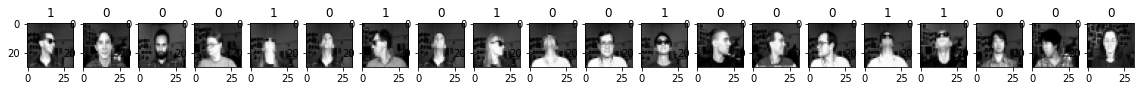

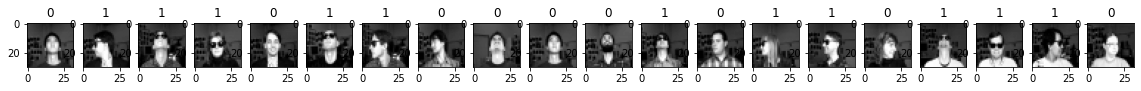

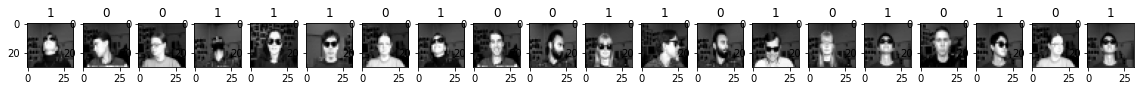

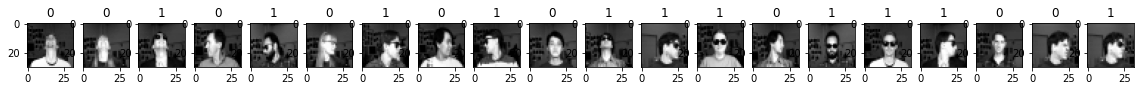

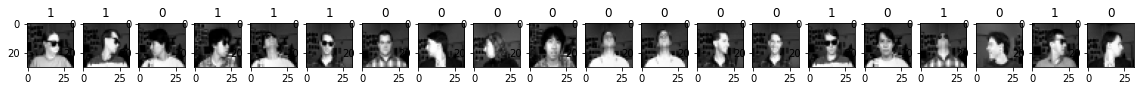

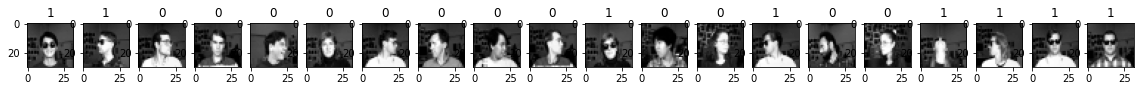

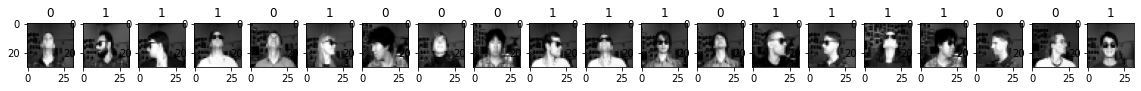

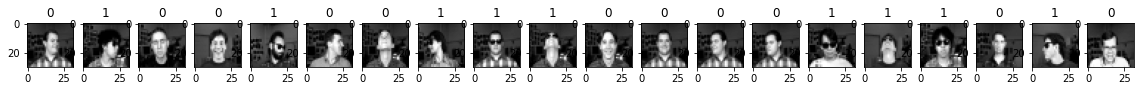

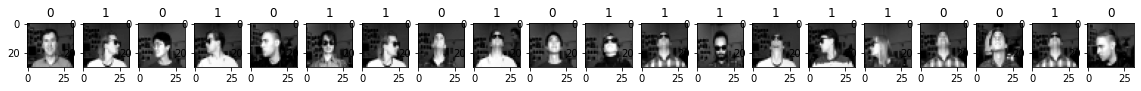

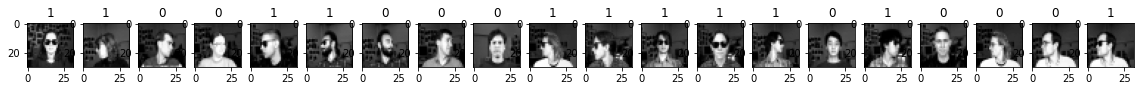

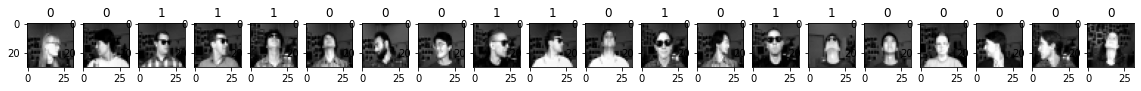

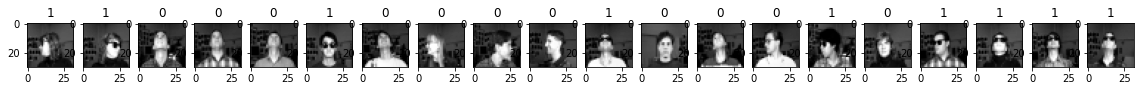

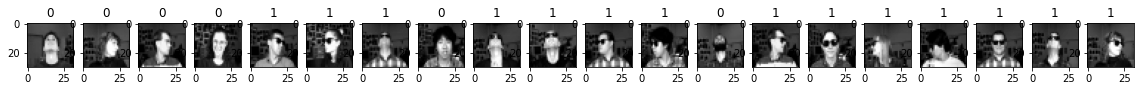

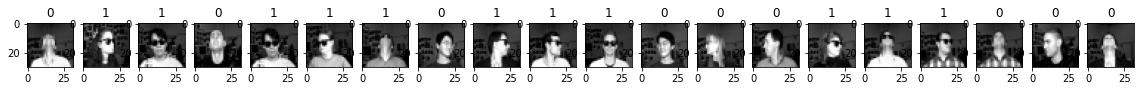

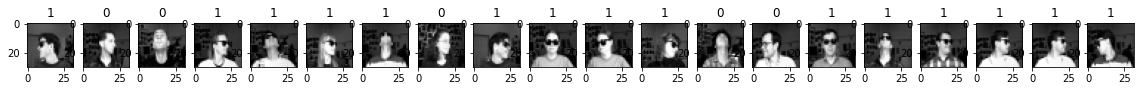

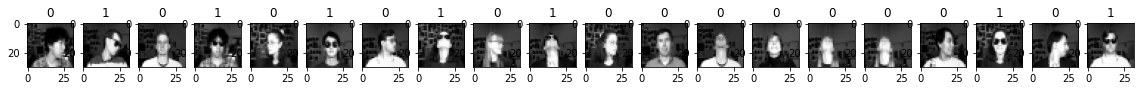

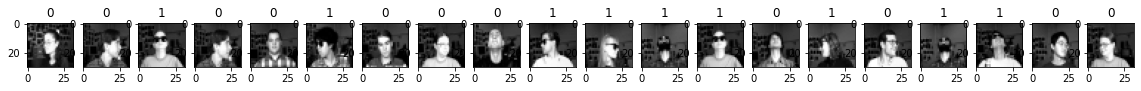

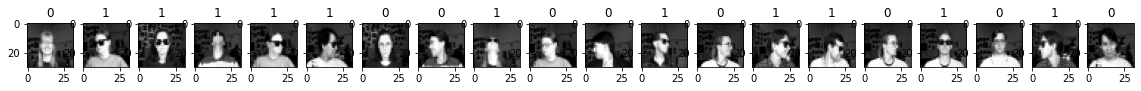

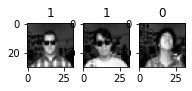

In [18]:
draw(data,target,20)
x_train,x_test,y_train,y_test=train_test_split(data,target,
                                      test_size=0.3,random_state=42)

do ann with 2  hidden layers and print the result

doing ann with 2 layers
accuracy is :  0.48663101604278075
printing the wrong guesses


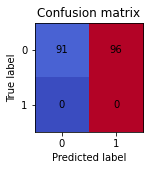

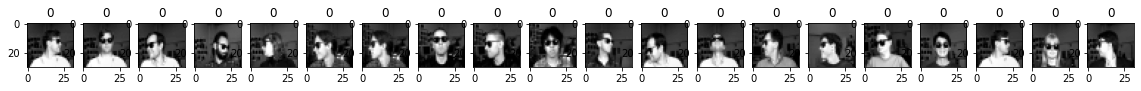

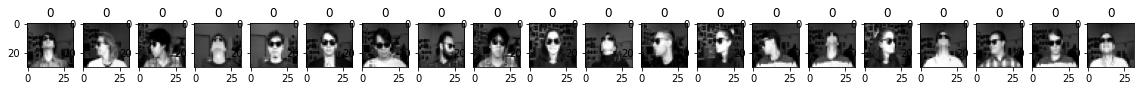

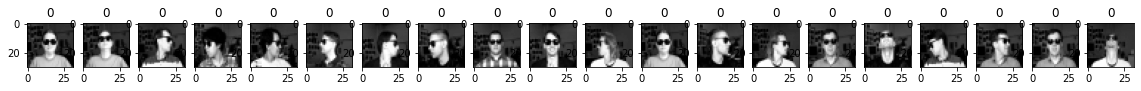

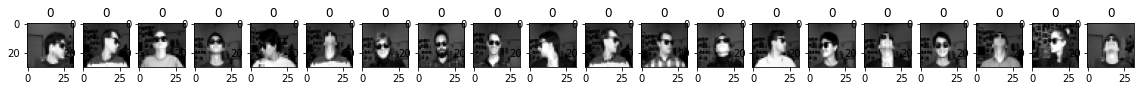

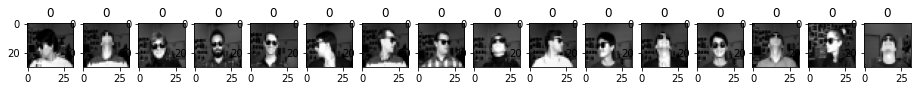

In [19]:
do_ann(2,x_train,x_test,y_train,y_test)

do ann with 4 hidden layers and print the result




doing ann with 4 layers
accuracy is :  0.48663101604278075
printing the wrong guesses


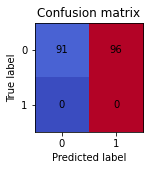

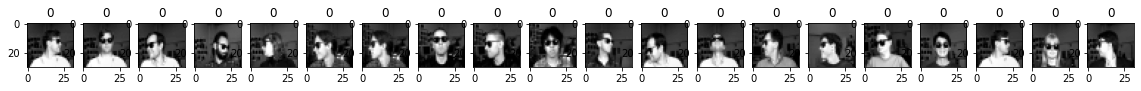

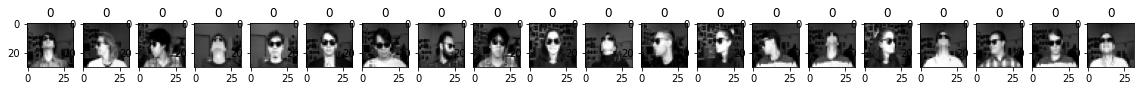

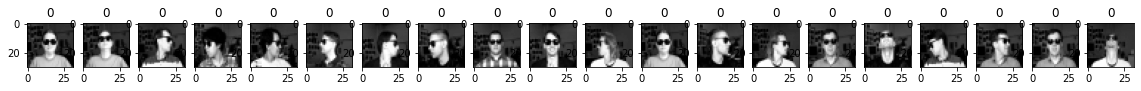

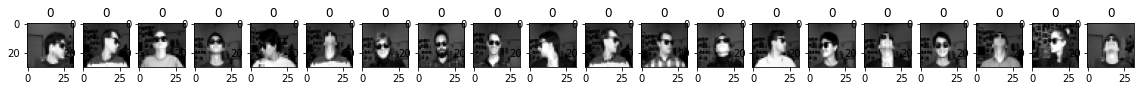

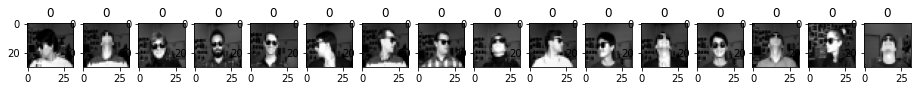

In [20]:
do_ann(4,x_train,x_test,y_train,y_test)

do ann with 10 hidden layers and print the result




doing ann with 10 layers
accuracy is :  0.9037433155080213
printing the wrong guesses


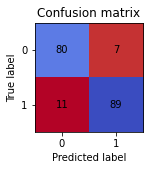

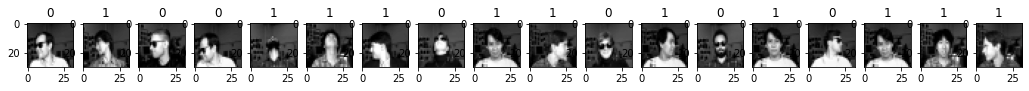

In [21]:
do_ann(10,x_train,x_test,y_train,y_test)

do ann with 50 hidden layers and print the result




doing ann with 50 layers
accuracy is :  0.8877005347593583
printing the wrong guesses


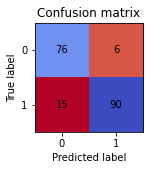

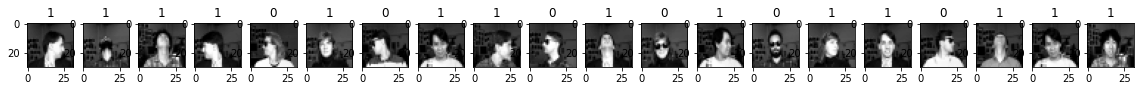

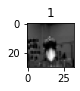

In [22]:
do_ann(50,x_train,x_test,y_train,y_test)